# Social Media Trends

Name: Christopher Hunt Jr.

## Project Overview

Link to original dataset from Kaggle:

- [Average Time Spend By A User On Social Media](https://www.kaggle.com/datasets/imyjoshua/average-time-spent-by-a-user-on-social-media)


## Load and Inspect Data

In [15]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

fname = 'Data/social_media.csv'
df = pd.read_csv(fname)
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [3]:
# Rows, Columns
print(f'There are {df.shape[0]} columns and {df.shape[1]} rows in this dataset.')

There are 1000 columns and 12 rows in this dataset.


In [4]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


## Cleaning the Data

In [5]:
# checking for any duplicates
df.duplicated().sum()

0

There are no duplicates in this Dataset.

In [14]:
df.isna().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [7]:
# addressing any inconsistent values in object columns
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
    print(f'Value Count: {col}')
    print(df[col].value_counts())
    print('\n')

Value Count: gender
male          337
non-binary    332
female        331
Name: gender, dtype: int64


Value Count: platform
Instagram    363
YouTube      330
Facebook     307
Name: platform, dtype: int64


Value Count: interests
Lifestlye    341
Sports       331
Travel       328
Name: interests, dtype: int64


Value Count: location
Australia         352
United Kingdom    329
United States     319
Name: location, dtype: int64


Value Count: demographics
Rural        340
Sub_Urban    335
Urban        325
Name: demographics, dtype: int64


Value Count: profession
Marketer Manager     355
Software Engineer    336
Student              309
Name: profession, dtype: int64




In [8]:
# addressing any inconsistent values in numeric columns
num_cols = df.select_dtypes('number').columns
for col in num_cols:
    print(f'Stats for: {col}')
    print(df[col].describe())
    print('\n')

Stats for: age
count    1000.000000
mean       40.986000
std        13.497852
min        18.000000
25%        29.000000
50%        42.000000
75%        52.000000
max        64.000000
Name: age, dtype: float64


Stats for: time_spent
count    1000.000000
mean        5.029000
std         2.537834
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: time_spent, dtype: float64


Stats for: income
count     1000.000000
mean     15014.823000
std       2958.628221
min      10012.000000
25%      12402.250000
50%      14904.500000
75%      17674.250000
max      19980.000000
Name: income, dtype: float64




## Exploratory Analysis

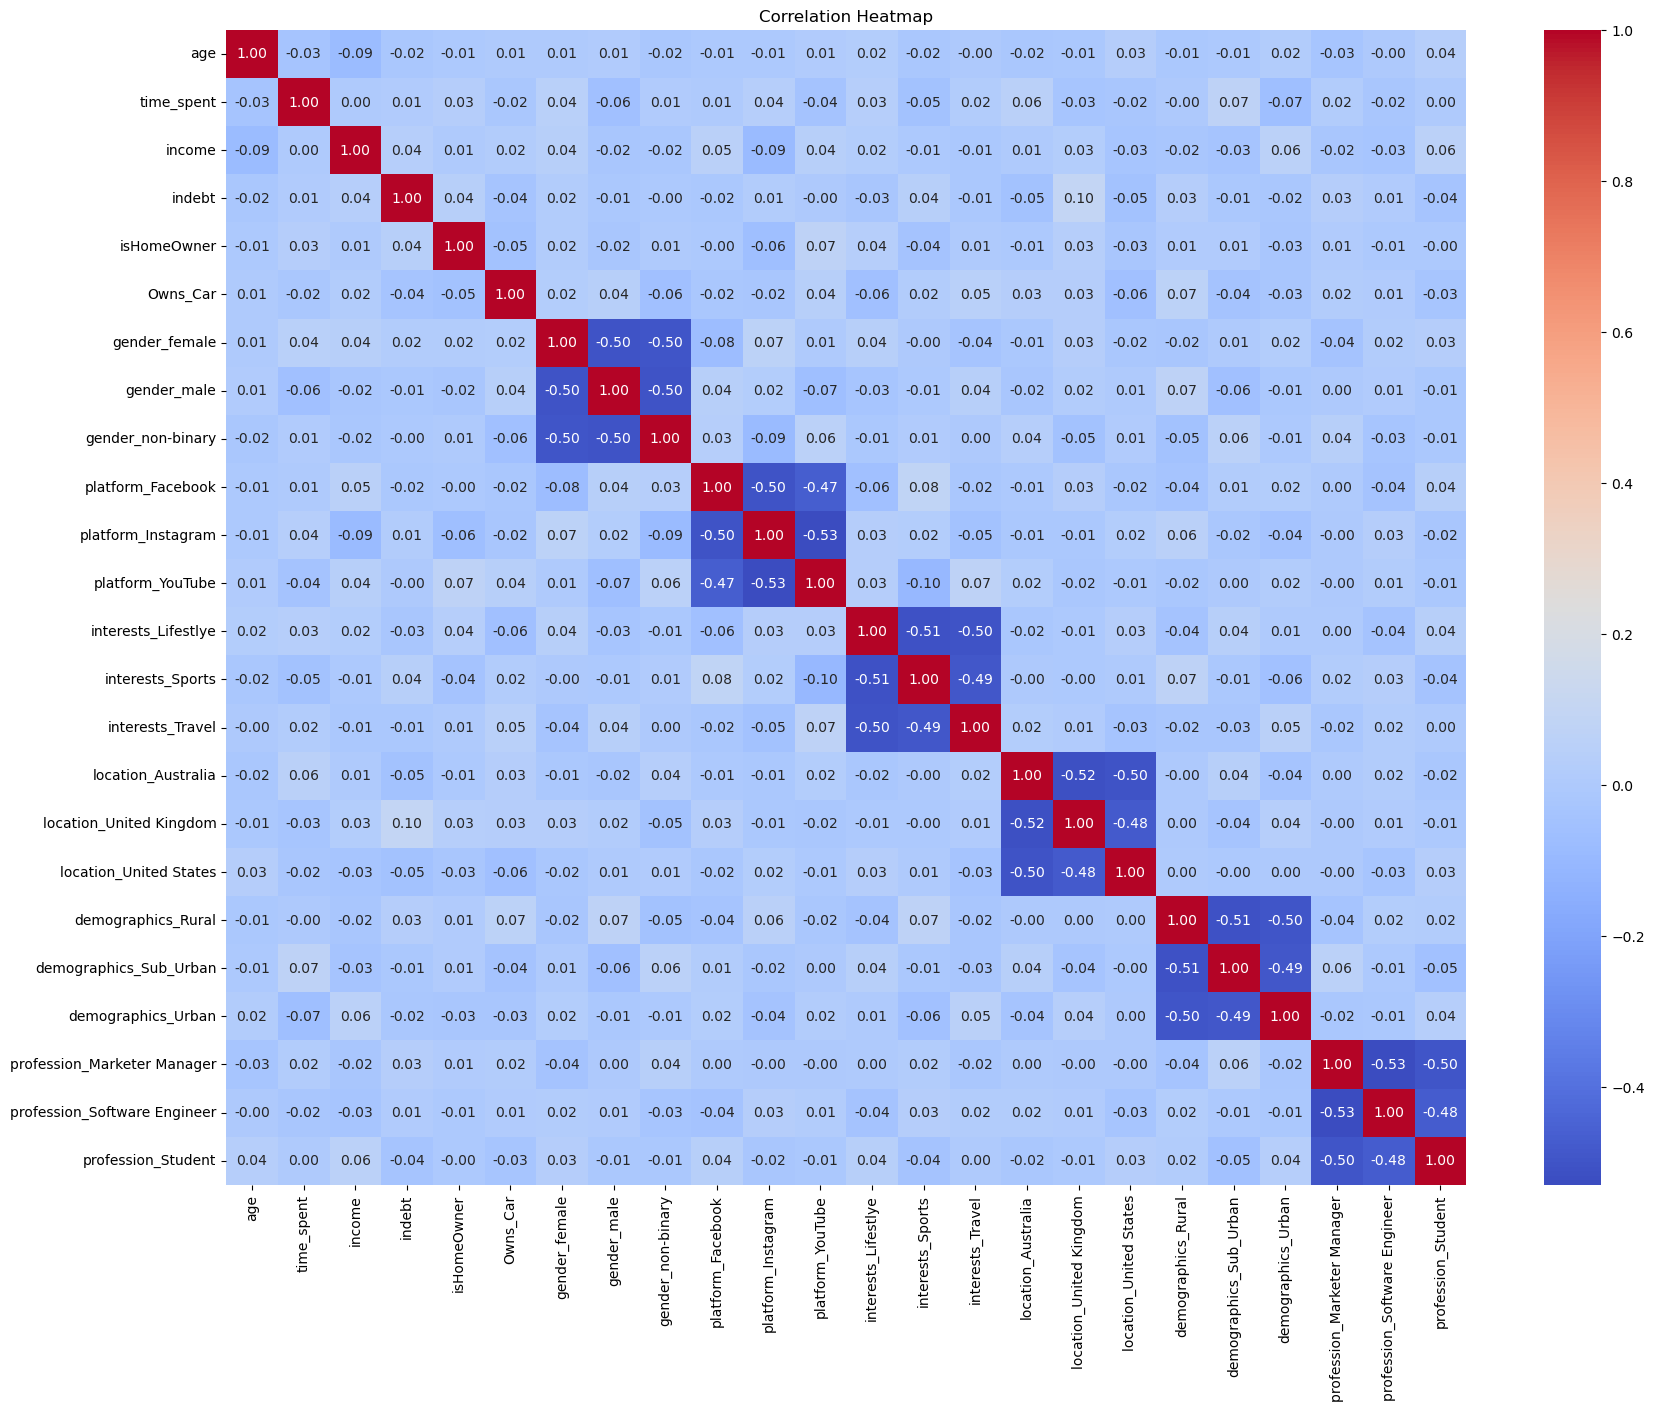

In [13]:
# convert object columns to categorical type
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')

# One-hot encoding on the object columns
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# lot the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
corr = df.corr(numeric_only=True)
corr

,age,time_spent,income,indebt,isHomeOwner,Owns_Car
age,1.000000,-0.033827,-0.087391,-0.017055,-0.005321,0.006921
time_spent,-0.033827,1.000000,0.004757,0.013079,0.029388,-0.020271
income,-0.087391,0.004757,1.000000,0.037860,0.006072,0.019789
indebt,-0.017055,0.013079,0.037860,1.000000,0.038102,-0.035641
isHomeOwner,-0.005321,0.029388,0.006072,0.038102,1.000000,-0.051411
Owns_Car,0.006921,-0.020271,0.019789,-0.035641,-0.051411,1.000000


Text(0.5, 1.0, 'Heatmap Correlation')

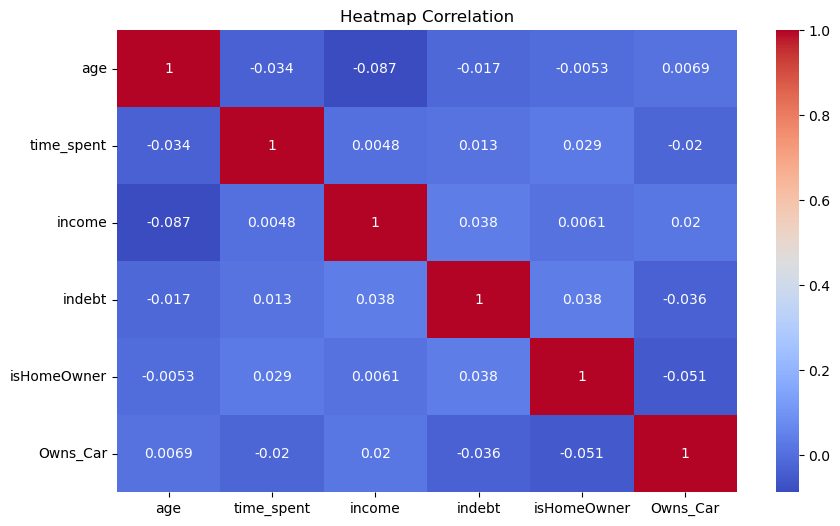

In [11]:
plt.figure(figsize=(10,6))

# creating a heatmap
ax = sns.heatmap(corr, cmap='coolwarm', annot=True);
ax.set_title('Heatmap Correlation')

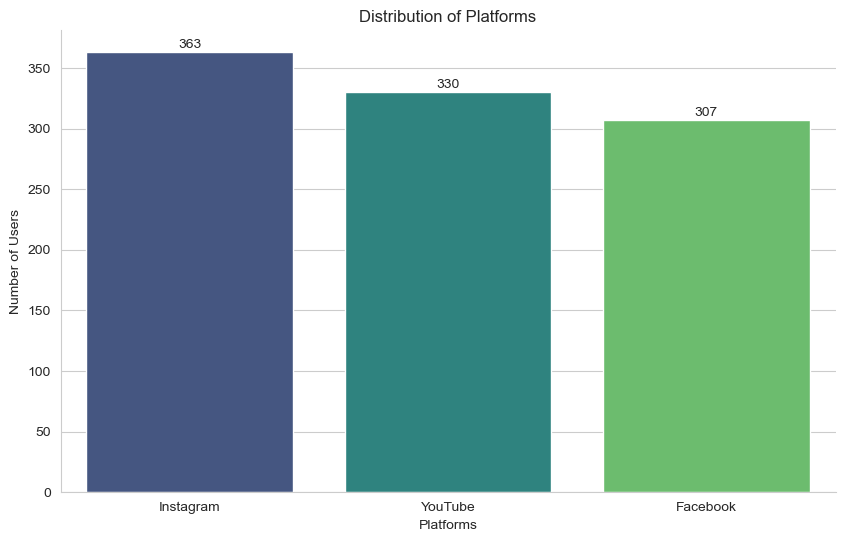

In [53]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each category in 'platform'
platform_counts = df['platform'].value_counts()

# Sort the counts from greatest to least
platform_counts_sorted = platform_counts.sort_values(ascending=False)

# Creating a countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='platform', order=platform_counts_sorted.index, palette='viridis')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Adding title and labels
ax.set_title('Distribution of Platforms')
ax.set_xlabel('Platforms')
ax.set_ylabel('Number of Users')

# Removing top and right spines
sns.despine()

plt.show()

The distribution of users across platforms is depicted in the graph above. Instagram emerges as the most popular platform with 363 users, closely followed by YouTube with 330 users, and then by Facebook with 307 users.

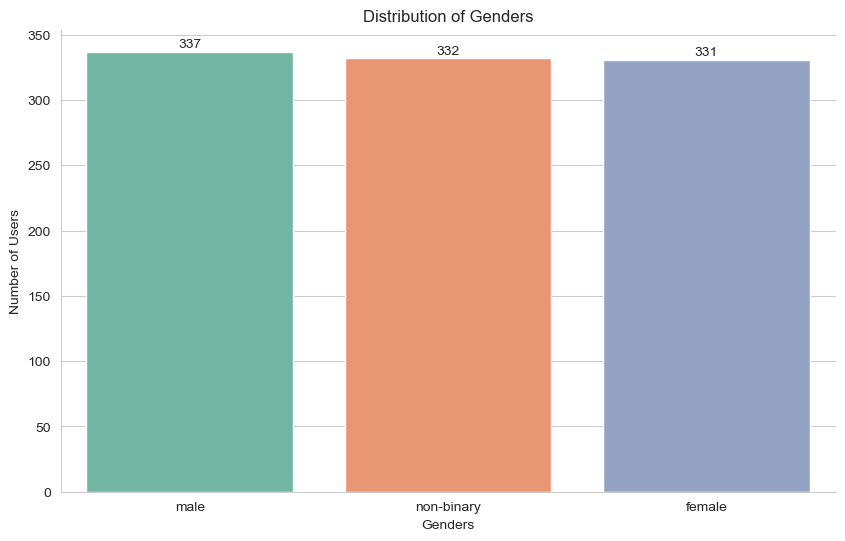

In [52]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each category in 'gender'
gender_counts = df['gender'].value_counts()

# Sort the counts from greatest to least
gender_counts_sorted = gender_counts.sort_values(ascending=False)

# Creating a countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='gender', order=gender_counts_sorted.index, palette='Set2')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Adding title and labels
ax.set_title('Distribution of Genders')
ax.set_xlabel('Genders')
ax.set_ylabel('Number of Users')

# Removing top and right spines
sns.despine()

plt.show()

As you can see from the graph above, the genders are spread out evenly.

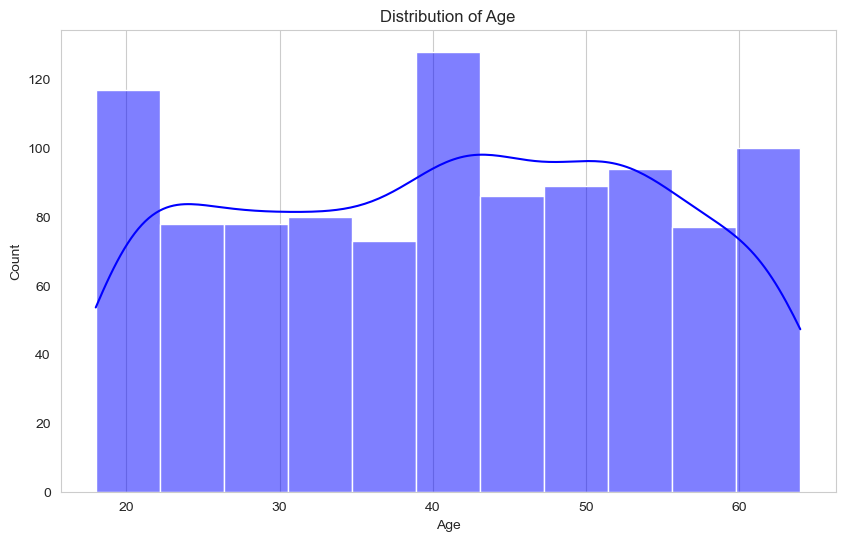

In [61]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a histogram of Age
plt.figure(figsize=(10, 6))

# Plotting the histogram
ax = sns.histplot(data=df, x='age', kde=True, bins='auto', color='blue')

# Adding title and labels
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Adding grid for better visualization
ax.grid(axis='y')

plt.show()


As we can see from the graph above, users who are in their early 40's and early 20's are the most active users amongst all ages.

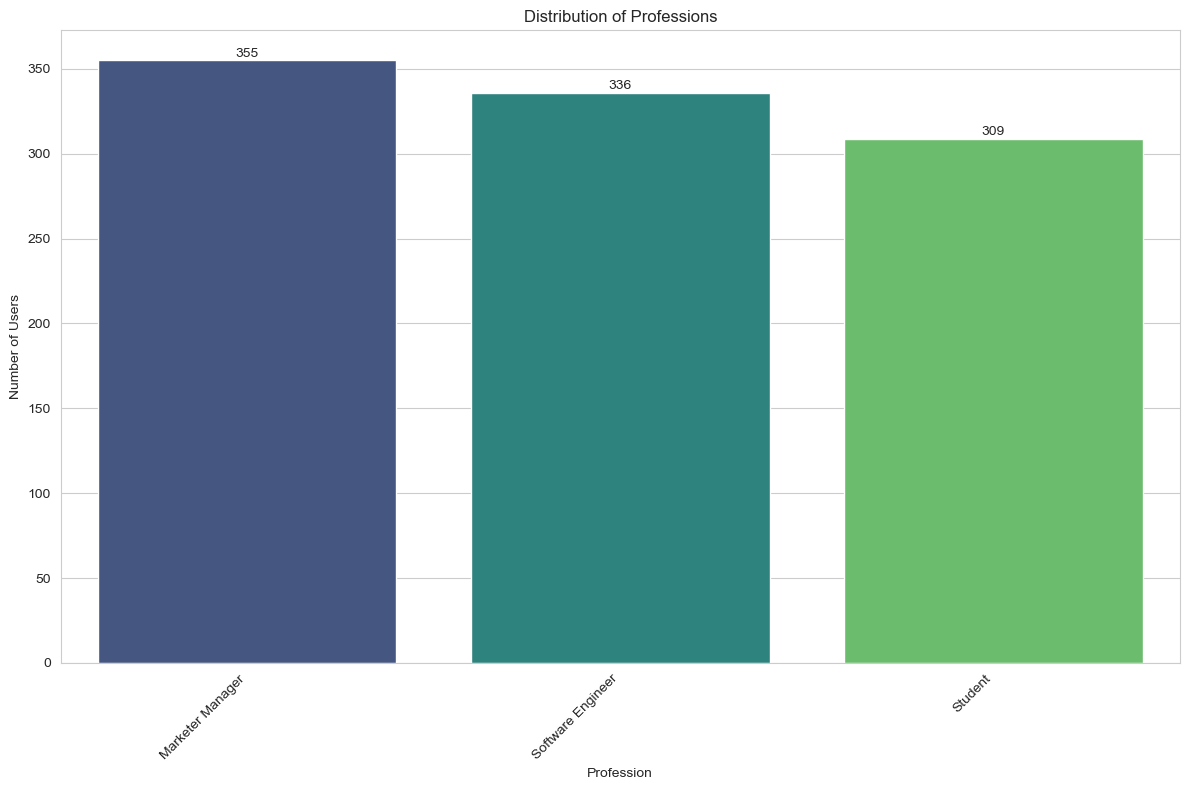

In [50]:
# Get the counts of each category in 'profession'
profession_counts = df['profession'].value_counts()

# Sort the counts from greatest to least
profession_counts_sorted = profession_counts.sort_values(ascending=False)

# Creating a countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='profession', order=profession_counts_sorted.index, palette='viridis')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Title and labels
ax.set_title('Distribution of Professions')
ax.set_xlabel('Profession')
ax.set_ylabel('Number of Users')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


The graph above illustrates that the most common profession among users is Marketing Manager, followed by Software Engineer, and then Student.

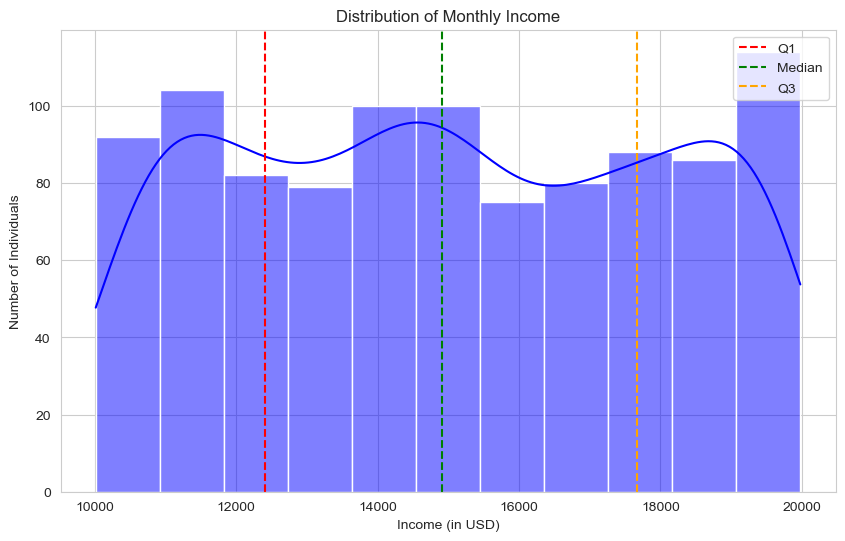

In [71]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Creating a histogram of Income per Month
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x='income', kde=True, bins='auto', color='blue')

# Adding title and labels
ax.set_title('Distribution of Monthly Income')
ax.set_xlabel('Income (in USD)')
ax.set_ylabel('Number of Individuals')

# Adding vertical lines for quartiles
q1 = df['income'].quantile(0.25)
q2 = df['income'].quantile(0.50)
q3 = df['income'].quantile(0.75)
plt.axvline(q1, color='red', linestyle='--', label='Q1')
plt.axvline(q2, color='green', linestyle='--', label='Median')
plt.axvline(q3, color='orange', linestyle='--', label='Q3')

# Adding legend
plt.legend()

plt.show()


The income distribution appears to be relatively uniform across all users, with the average user making roughly 15,000.

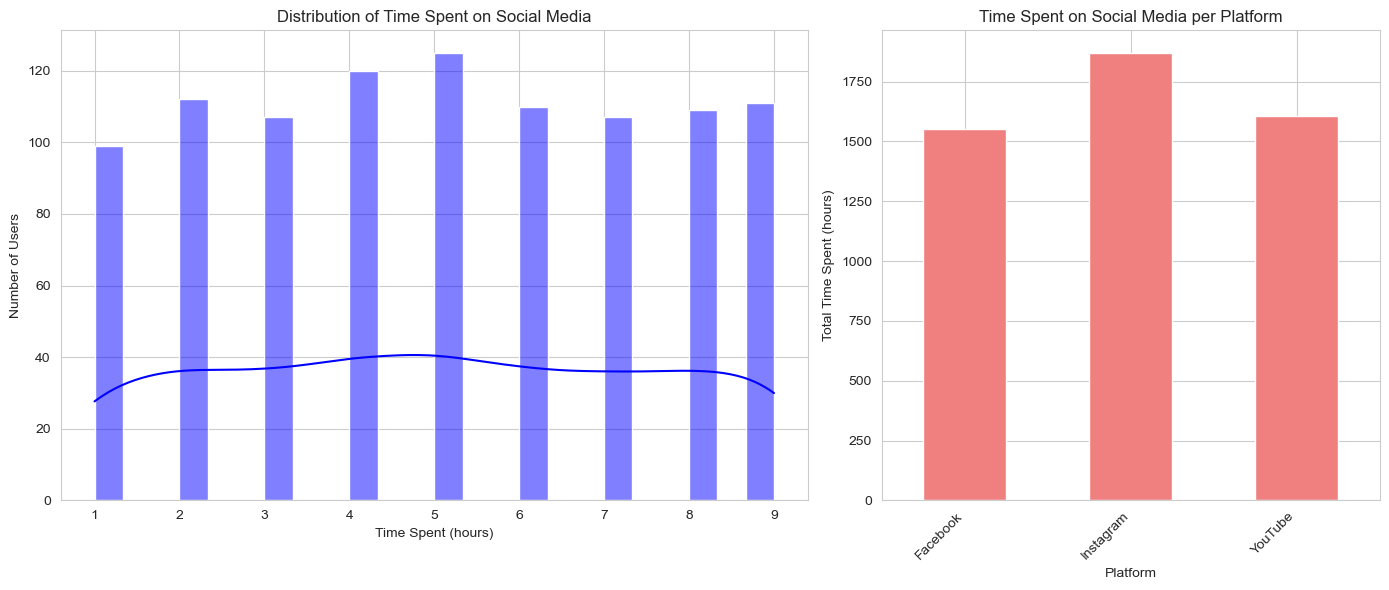

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate time spent per platform
time_spent_per_platform = df.groupby('platform')['time_spent'].sum()

# Set up the figure and axes
plt.figure(figsize=(14, 6))
gs = plt.GridSpec(1, 2, width_ratios=[3, 2])

# Plot histogram of time spent on social media
ax1 = plt.subplot(gs[0])
sns.histplot(data=df, x='time_spent', kde=True, bins=24, ax=ax1, color='blue')
ax1.set_title('Distribution of Time Spent on Social Media')
ax1.set_xlabel('Time Spent (hours)')
ax1.set_ylabel('Number of Users')

# Plot bar chart for time spent per platform
ax2 = plt.subplot(gs[1])
time_spent_per_platform.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Time Spent on Social Media per Platform')
ax2.set_xlabel('Platform')
ax2.set_ylabel('Total Time Spent (hours)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


The majority of users  spend between 4 to 5 hours on social media, with Instagram being the platform where users spend the most time.

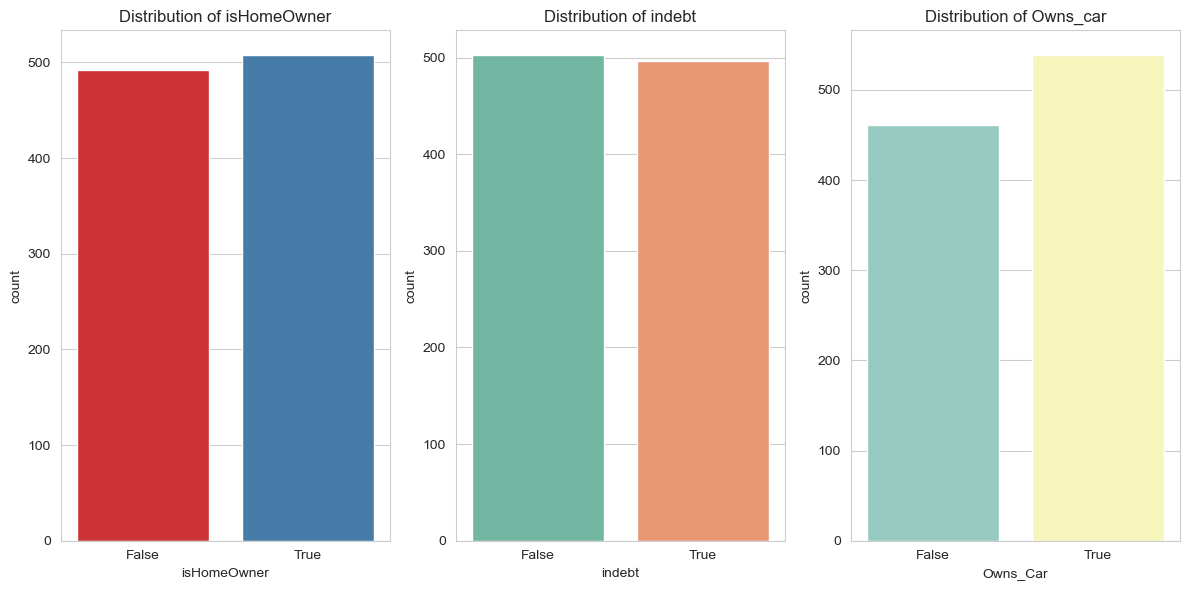

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plotting countplots for each boolean column
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='isHomeOwner', palette='Set1')
plt.title('Distribution of isHomeOwner')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='indebt', palette='Set2')
plt.title('Distribution of indebt')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Owns_Car', palette='Set3')
plt.title('Distribution of Owns_car')

plt.tight_layout()
plt.show()


The data indicates that more than half of the individuals are homeowners, while over half are not in debt, and a majority also own a car.

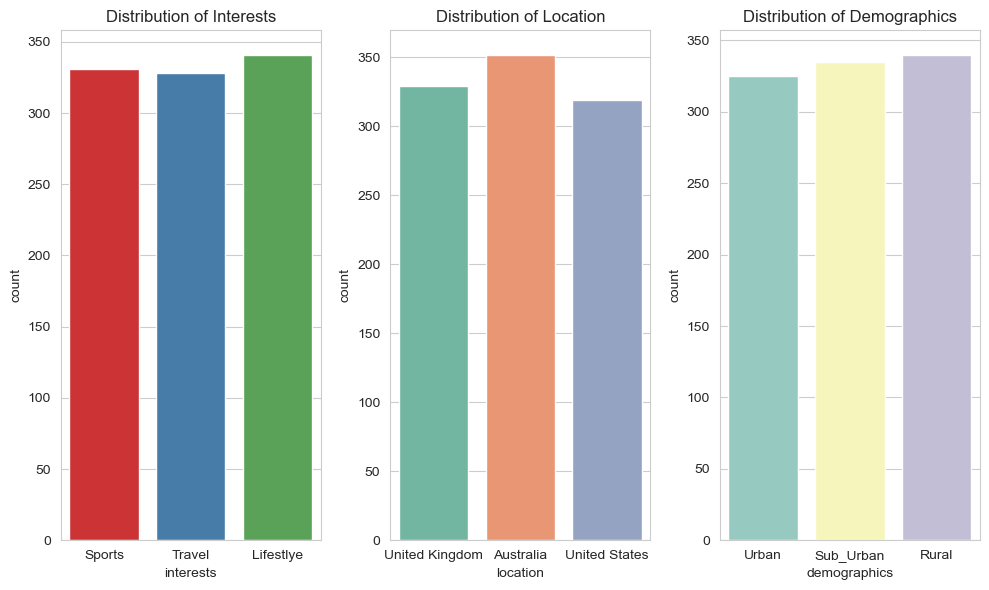

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plotting countplots for each object column
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='interests', palette='Set1')
plt.title('Distribution of Interests')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='location', palette='Set2')
plt.title('Distribution of Location')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='demographics', palette='Set3')
plt.title('Distribution of Demographics')

plt.tight_layout()
plt.show()


The data suggests that the majority of individuals have a keen interest in lifestyle-related topics, with Australia being the predominant location, and rural areas being the most common demographic residence.

### Multivariate Visualizations

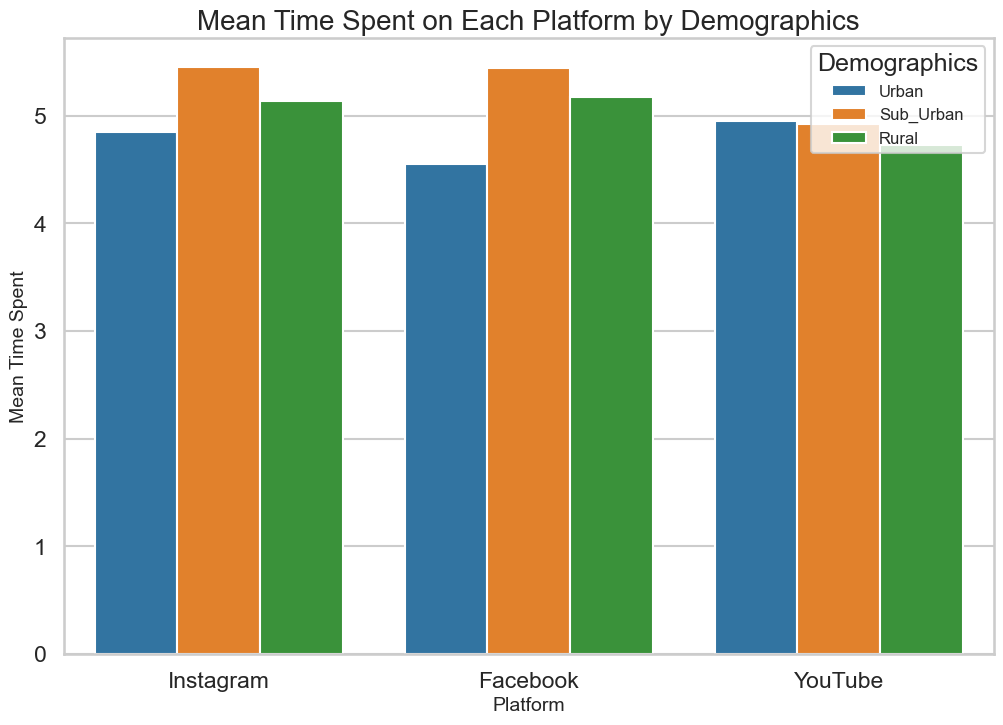

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Set figure size
plt.figure(figsize=(12, 8))

# Create bar chart
sns.barplot(data=df, x='platform', y='time_spent', hue='demographics', errorbar=None)

# Add title
plt.title('Mean Time Spent on Each Platform by Demographics', fontsize=20)

# Set x-axis label
plt.xlabel('Platform', fontsize=14)

# Set y-axis label
plt.ylabel('Mean Time Spent', fontsize=14)

# Set legend title and adjust legend position
plt.legend(title='Demographics', loc='upper right', fontsize=12)

# Show plot
plt.show()

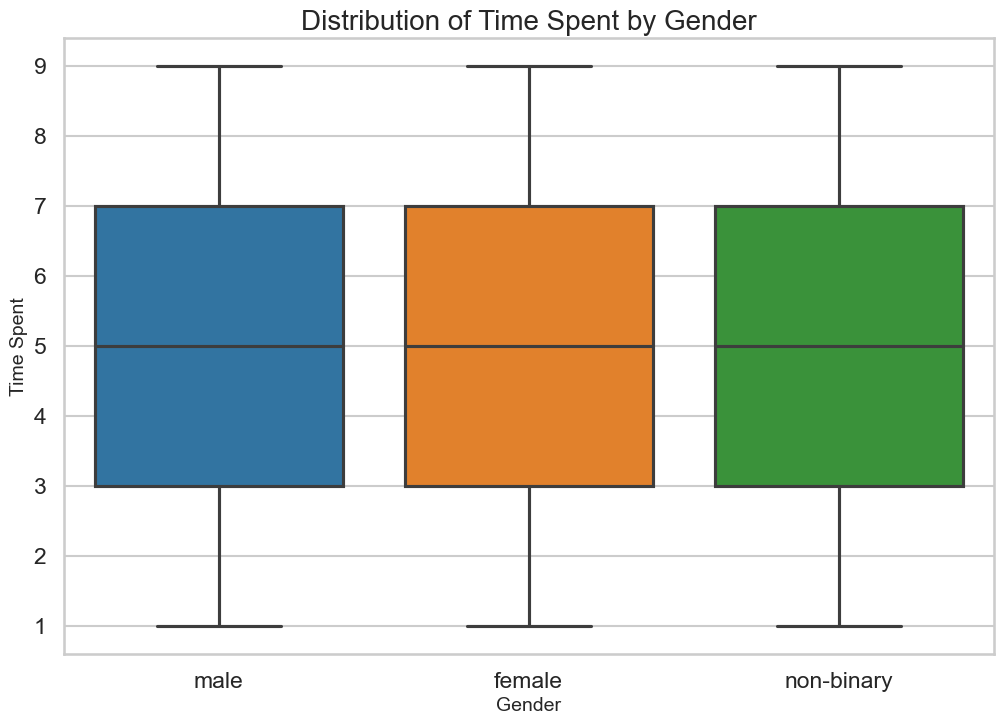

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Set figure size
plt.figure(figsize=(12, 8))

# Create boxplot
sns.boxplot(data=df, x='gender', y='time_spent')

# Add title
plt.title('Distribution of Time Spent by Gender', fontsize=20)

# Set x-axis label
plt.xlabel('Gender', fontsize=14)

# Set y-axis label
plt.ylabel('Time Spent', fontsize=14)

# Show plot
plt.show()